<a href="https://colab.research.google.com/github/AlexisCohen/Data-Sci/blob/main/Alexis_Cohen_Stats_Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Midterm Project

Directions:

*   Use any and all resources available to you
*   Comment and explain the code
*   Answer the questions to the best of your abilities
*   There are no points for pain: ask for help

Save this notebook to your GitHub and submit the link.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Getting your data

Create a google form to input your data.
Follow the same method as [Lab 5](https://colab.research.google.com/drive/1zYvyhrz2wVnJXlZqj_PpxOxplfS3LN9Y?usp=sharing).

In [ ]:
import pandas as pd
def get_database(url): # This function loads the google spreadsheet
    url_head = "https://docs.google.com/spreadsheets/d/"
    url_foot = "/gviz/tq?tqx=out:csv&sheet="
    url_body = url.split('/')[5]
    sheet_name = "1"
    url_csv = url_head + url_body + url_foot + sheet_name
    df = pd.read_csv(url_csv, sep=',', skiprows=0)
    return df
#this imports the data and creates a variable(url_csv) that automatically formates a url to be added into the collab then prints df
#the data imported is a google sheet

Put your form url here:

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/1slfpNOODEH30ovUp3SeyaBZmI339P0W_fE8665r6nQM/edit?usp=sharing'
#this is a google sheet with peoples responses

In [ ]:
data = get_database(url)
#this extracts the data from the spreadsheet into the variable
data

,Timestamp,What is the Circumference of your circle?,What is the Diameter of your circle?
0,10/20/2022 1:22:15,25.00,8.00
1,10/20/2022 1:24:01,22.00,7.00
2,10/22/2022 12:58:54,9.42,3.00
3,10/22/2022 12:59:13,28.27,9.00
4,10/22/2022 12:59:34,6.28,2.00
5,10/22/2022 12:59:48,4.71,1.50
6,10/22/2022 13:00:16,2.36,0.75
7,10/22/2022 13:00:40,7.70,2.45


In [ ]:
data = np.array(data)
data
#this formats the extracted data into a text array

array([['10/20/2022 1:22:15', 25.0, 8.0],
       ['10/20/2022 1:24:01', 22.0, 7.0],
       ['10/22/2022 12:58:54', 9.42, 3.0],
       ['10/22/2022 12:59:13', 28.27, 9.0],
       ['10/22/2022 12:59:34', 6.28, 2.0],
       ['10/22/2022 12:59:48', 4.71, 1.5],
       ['10/22/2022 13:00:16', 2.36, 0.75],
       ['10/22/2022 13:00:40', 7.7, 2.45]], dtype=object)

In [ ]:
circumferences = data[:,1]
diameters = data[:,2]

#assign the answers of your google form to their respective variables

In [ ]:
diameters
#this prints the array assigned to diameters

array([8.0, 7.0, 3.0, 9.0, 2.0, 1.5, 0.75, 2.45], dtype=object)

In [ ]:
circumferences
#this prints the array assigned to circumferences

array([25.0, 22.0, 9.42, 28.27, 6.28, 4.71, 2.36, 7.7], dtype=object)

Plot your data points

In [ ]:
X = diameters
Y = circumferences
#assigns values to the variables X, and Y

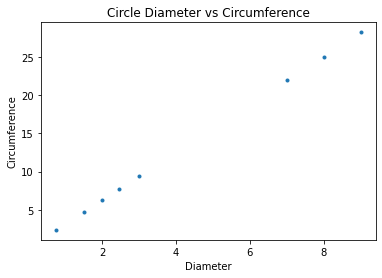

In [ ]:
plt.title("Circle Diameter vs Circumference")

plt.xlabel("Diameter")
plt.ylabel("Circumference")

plt.plot(X,Y, ".");

#This plots X and Y which are correlated to the values of diameters and circumferences respectably

## Part 2: Linear Fit

Follow the steps in the [Linear Fit notebook]() to run a linear fit on your data.

In [ ]:
best_loss = 100000000
best_m = 0
best_b = 0

for m_guess in np.linspace(-100,100,100):
    for b_guess in np.linspace(-100,100,100):

        y_guess = m_guess * X + b_guess

        loss = np.sum((y_guess - Y)**2)

        if loss < best_loss:

            best_m = m_guess
            best_b = b_guess
            best_loss = loss

#this calculates the best guess for the slope of the line that goes through 
#all the points of the original graph, it then saves that and assigns it to a variable

Plot the line of best fit:

Use blue dots for the collected data and a red line for the estimate.

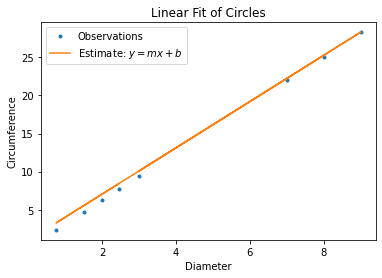

In [ ]:
plt.title('Linear Fit of Circles')

plt.xlabel('Diameter')
plt.ylabel('Circumference')

# Plot the collected data
plt.plot(X,Y, '.', label='Observations')

y_estimate = best_m * X + best_b

# Plot the line of best fit
plt.plot(X, y_estimate, label=f'Estimate: $y = m x + b$')

plt.legend();

#This plots the original points of the graph and the best guess
#of m and b calculated by the previous for loop

In [ ]:
print(best_loss,best_m,best_b)

3.308145230078584 3.030303030303031 1.0101010101010104


The estimated relationship is:

$C = (3.030303) D + (1.010101)$

## Part 3: Interpretation

Answer the questions in text cells

#### Question 1:

What do $m$ and $b$ represent in these equations?

M represents the slope of the line and b represents the y-intercept on the graph

#### Question 2:

Guess what the correct values $m$ and $b$ should be.

m = 3.14, b = 0

#### Question 3:

Does it make sense to include $b$ in the parameters?

If it was possible to have a circle that had a diameter of 0 and also have an intitial circumference of b, then it would make more sense. However, for this chart because the slope may not be the most accurate then the b variable makes sense to help make the line more accurate.

## Bonus:

These problems are extra credit. You may use any resources, but be sure to explain your code.

#### Bonus 1: Plot the squared errors from your line of best fit

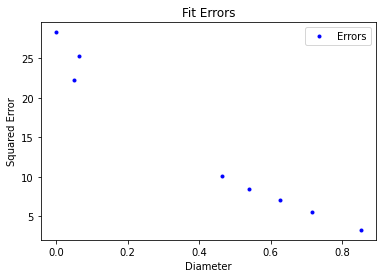

In [ ]:
plt.title("Fit Errors")

plt.xlabel("Diameter")
plt.ylabel("Squared Error")

squared_error = (y_estimate - Y)**2

plt.plot(squared_error, y_estimate, 'b.', label = "Errors")

plt.legend();

#### Bonus 2: Plot the errors as a histogram

In [ ]:
plt.title("Errors")

...

What distribution does this histogram look like?

#### Bonus 3: Find the circle with the largest error. 
Hint: use np.max

In [ ]:
largest_error = ...

#### Bonus 4: Remove the circles with the 2 largest errors and run the fit again.


In [ ]:
...